<a href="https://colab.research.google.com/github/Luis-Menezes/CI-Chemistry/blob/main/handson_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Intelligence in Chemistry - Hands-on dataset analysis

## Needed packages

In [25]:
!pip install --quiet rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 27.0 MB/s eta 0:00:00


In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

## 1. Load and unpack QM9 dataset

In [1]:
!wget -O data.xyz.tar.bz2 https://www.dropbox.com/scl/fi/2ugqxr9fa9nob1byc8ura/dsgdb9nsd.xyz.tar.bz2?rlkey=pp2k6fy4360yldrypwghwbi6d&st=1cohswqh&dl=0

--2025-09-18 16:05:53--  https://www.dropbox.com/scl/fi/2ugqxr9fa9nob1byc8ura/dsgdb9nsd.xyz.tar.bz2?rlkey=pp2k6fy4360yldrypwghwbi6d
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucecb17112347310ba933353761e.dl.dropboxusercontent.com/cd/0/inline/CxmoluCoJ9NjwR6Dhy0ct0cNMH1u472kLLRsA4czVa7XqCwafO9ovdp4gWp44MWDrSGhVoGhhe7Y9HCggg7u7kN6CYSVSSmrbpDBu8CP8DnQYDbKAWo1lv-TEJ2Y9YQE8lmIAhZDo1Z3Htar6KGRZ0Yz/file# [following]
--2025-09-18 16:05:53--  https://ucecb17112347310ba933353761e.dl.dropboxusercontent.com/cd/0/inline/CxmoluCoJ9NjwR6Dhy0ct0cNMH1u472kLLRsA4czVa7XqCwafO9ovdp4gWp44MWDrSGhVoGhhe7Y9HCggg7u7kN6CYSVSSmrbpDBu8CP8DnQYDbKAWo1lv-TEJ2Y9YQE8lmIAhZDo1Z3Htar6KGRZ0Yz/file
Resolving ucecb17112347310ba933353761e.dl.dropboxusercontent.com (ucecb17112347310ba933353761e.dl.dropboxusercontent.com)... 162.125.1.1

In [2]:
!mkdir qm9_files
!tar -xjf data.xyz.tar.bz2 -C qm9_files/

## 2. Open XYZ files and extract the properties and SMILES

In [52]:
qm9_folder = 'qm9_files/'
QM9_PROPERTIES = [
    "A", 'B', 'C', 'mu', 'alpha',
    'homo', 'lumo', 'gap', 'r2',
    'zpve', 'U0', 'U', 'H', 'G', 'Cv'
]

with open(qm9_folder+'dsgdb9nsd_113885.xyz') as file:
  for line in file:
    print(line)

19

gdb 113885	3.70802	0.80999	0.7081	2.6975	73.65	-0.2639	0.0141	0.278	1593.5236	0.156316	-460.174889	-460.164623	-460.163679	-460.212278	35.326	

C	-0.008898706	 1.435343511	-0.1229342875	-0.480889

C	-0.097211668	-0.0611740136	 0.0533750899	 0.431334

O	-0.522805097	-0.6329577977	 1.0223608396	-0.34442

O	 0.3874153201	-0.692641184	-1.0454419183	-0.247509

C	 0.3502508225	-2.1099666389	-1.0216443391	 0.118249

C	-0.6452778548	-2.8049992501	-1.9010293635	-0.305338

C	 0.8299955957	-2.806393386	-2.257736521	-0.04378

C	 1.3090797685	-2.0281448361	-3.4552388748	-0.093611

O	 1.0953742585	-2.8320000843	-4.6085691448	-0.419869

H	-0.3728027153	 1.9278328937	 0.7777832851	 0.149542

H	 1.0248947898	 1.7315350968	-0.3210999853	 0.149596

H	-0.6070917791	 1.7459702376	-0.9844780335	 0.149165

H	 0.576972916	-2.5190329042	-0.0453019279	 0.12476

H	-1.1102986284	-3.7153217605	-1.5406769745	 0.122235

H	-1.2860640388	-2.1730656326	-2.5065209428	 0.123942

H	 1.3703384329	-3.7344941519	-2.09474

In [57]:
def load_validate_mol(file):
  with open(file, 'r') as file:
    n_atoms = int(file.readline())

    properties_list = file.readline().split()
    mol_id = properties_list[1]
    properties_values = [float(prop) for prop in properties_list[2:]]

    atoms = []
    for nlines in range(n_atoms):
      atom = file.readline().split()
      atoms.append(atom[0]) # get only the the atom string

      # Since we doesn't need coordinates for this assignment, we will ignore it for now
      # atom_coords = atom[1:3]
      # atom_coords = [float(coord) for coord in atom_coords]
      # print(atom)
    # print(atoms)
    file.readline() # ignores the frequencies

    smiles_list = file.readline().split()
    properties_dict = dict(zip(QM9_PROPERTIES, properties_values))


    mol = Chem.MolFromSmiles(smiles_list[0]) # If it's None then smiles is invalid
    if mol is None:
        print("Invalid smiles for arquive: ", mol_id)
        return
    canon_smiles = Chem.CanonSmiles(smiles_list[0])


    molecule_data = {
                'id': mol_id,
                'n_atoms': n_atoms,
                'atom_list': atoms,
                'smiles': canon_smiles
            }
            # Adiciona as 12 propriedades ao dicionário principal
    molecule_data.update(properties_dict)
    return molecule_data


def get_full_dataset(folder):
  dataset_list = []
  # print(f"Lendo arquivos da pasta: {folder}")

  files_to_process = [f for f in os.listdir(folder) if f.endswith('.xyz')]
  for i, file in enumerate(files_to_process):

      if (i + 1) % 10000 == 0:
          print(f"  Processando arquivo {i+1}/{len(files_to_process)}...")

      file_path = os.path.join(folder, file)

      # Chama a função de processamento para um arquivo
      molecule_data = load_validate_mol(file_path)

      # Se a função retornou dados válidos (não None), adiciona à lista
      if molecule_data:
          dataset_list.append(molecule_data)
  return dataset_list




if __name__ == '__main__':
  full_dataset = get_full_dataset(qm9_folder)

  df = pd.DataFrame(full_dataset)
  # load_validate_mol(qm9_folder+'dsgdb9nsd_113885.xyz')

  Processando arquivo 10000/133885...
  Processando arquivo 20000/133885...
  Processando arquivo 30000/133885...
  Processando arquivo 40000/133885...
  Processando arquivo 50000/133885...
  Processando arquivo 60000/133885...
  Processando arquivo 70000/133885...
  Processando arquivo 80000/133885...
  Processando arquivo 90000/133885...
  Processando arquivo 100000/133885...
  Processando arquivo 110000/133885...
  Processando arquivo 120000/133885...
  Processando arquivo 130000/133885...


## 3. Creating the DataFrame

In [58]:
df.head(10)

,id,n_atoms,atom_list,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv
0,45244,16,"[O, C, O, C, C, N, C, C, C, H, H, H, H, H, H, H]",O=C1OC2CN3CC2C13,3.53937,1.71866,1.54859,4.5699,67.19,-0.2517,-0.0107,0.2410,875.9941,0.128437,-437.881973,-437.876133,-437.875189,-437.912089,24.487
1,117050,19,"[C, C, N, C, O, C, N, O, C, H, H, H, H, H, H, ...",CCNC(=O)C(=N)OC,4.13569,0.80331,0.71080,2.9981,76.23,-0.2446,-0.0260,0.2185,1639.3039,0.158040,-456.380653,-456.370335,-456.369391,-456.417682,35.642
2,45913,14,"[N, C, C, N, C, N, C, O, O, H, H, H, H, H]",N=C1CNC(=N)C(=O)O1,3.01344,1.52956,1.04288,2.4806,66.98,-0.2572,-0.0685,0.1887,1063.4531,0.102861,-470.049276,-470.041750,-470.040806,-470.081813,27.828
3,102792,17,"[N, C, O, C, C, O, O, C, N, H, H, H, H, H, H, ...",N=COC(CO)C(N)=O,2.01096,1.33494,0.94277,1.8713,67.68,-0.2491,0.0053,0.2544,1260.4461,0.135371,-492.303426,-492.293840,-492.292896,-492.338737,33.991
4,106503,19,"[O, C, C, C, C, C, C, O, O, H, H, H, H, H, H, ...",OCC12CC(CC1O)O2,2.56571,1.65961,1.25325,2.1659,70.35,-0.2379,0.0457,0.2836,1039.7937,0.159985,-460.134953,-460.126793,-460.125849,-460.167454,32.140
5,54634,18,"[C, C, O, C, C, N, C, C, C, H, H, H, H, H, H, ...",CC(=O)C1=CN2CC2C1,3.90349,1.13270,0.94831,3.6725,80.60,-0.2303,-0.0465,0.1839,1242.7487,0.147639,-401.952941,-401.944698,-401.943754,-401.986192,30.909
6,98470,19,"[C, C, C, C, O, C, O, C, O, H, H, H, H, H, H, ...",CCC1(C(=O)CO)CO1,2.36607,1.21013,0.97745,2.6061,72.04,-0.2457,-0.0226,0.2231,1287.9950,0.155686,-460.149708,-460.139597,-460.138653,-460.185242,35.894
7,81659,19,"[O, C, C, C, C, C, C, C, O, H, H, H, H, H, H, ...",OC1C2C=CCCC1O2,2.22690,1.81725,1.66654,1.3056,75.01,-0.2450,-0.0044,0.2406,955.4786,0.161816,-423.014688,-423.007321,-423.006377,-423.046130,30.081
8,7516,17,"[C, C, C, C, O, C, C, N, H, H, H, H, H, H, H, ...",CC1CC1(O)CC#N,5.03442,1.18985,1.13178,3.2135,69.03,-0.2714,0.0254,0.2968,1089.7298,0.140545,-363.867718,-363.859029,-363.858085,-363.900884,31.690
9,123751,16,"[C, C, C, C, N, N, N, N, N, H, H, H, H, H, H, H]",C1CC(n2nnnn2)C1,5.16694,1.04692,1.01008,5.2289,70.36,-0.3136,-0.0438,0.2698,1187.6614,0.126234,-430.187787,-430.180550,-430.179605,-430.220652,26.284


## 4. Plotting all properties distributions

KeyboardInterrupt: 

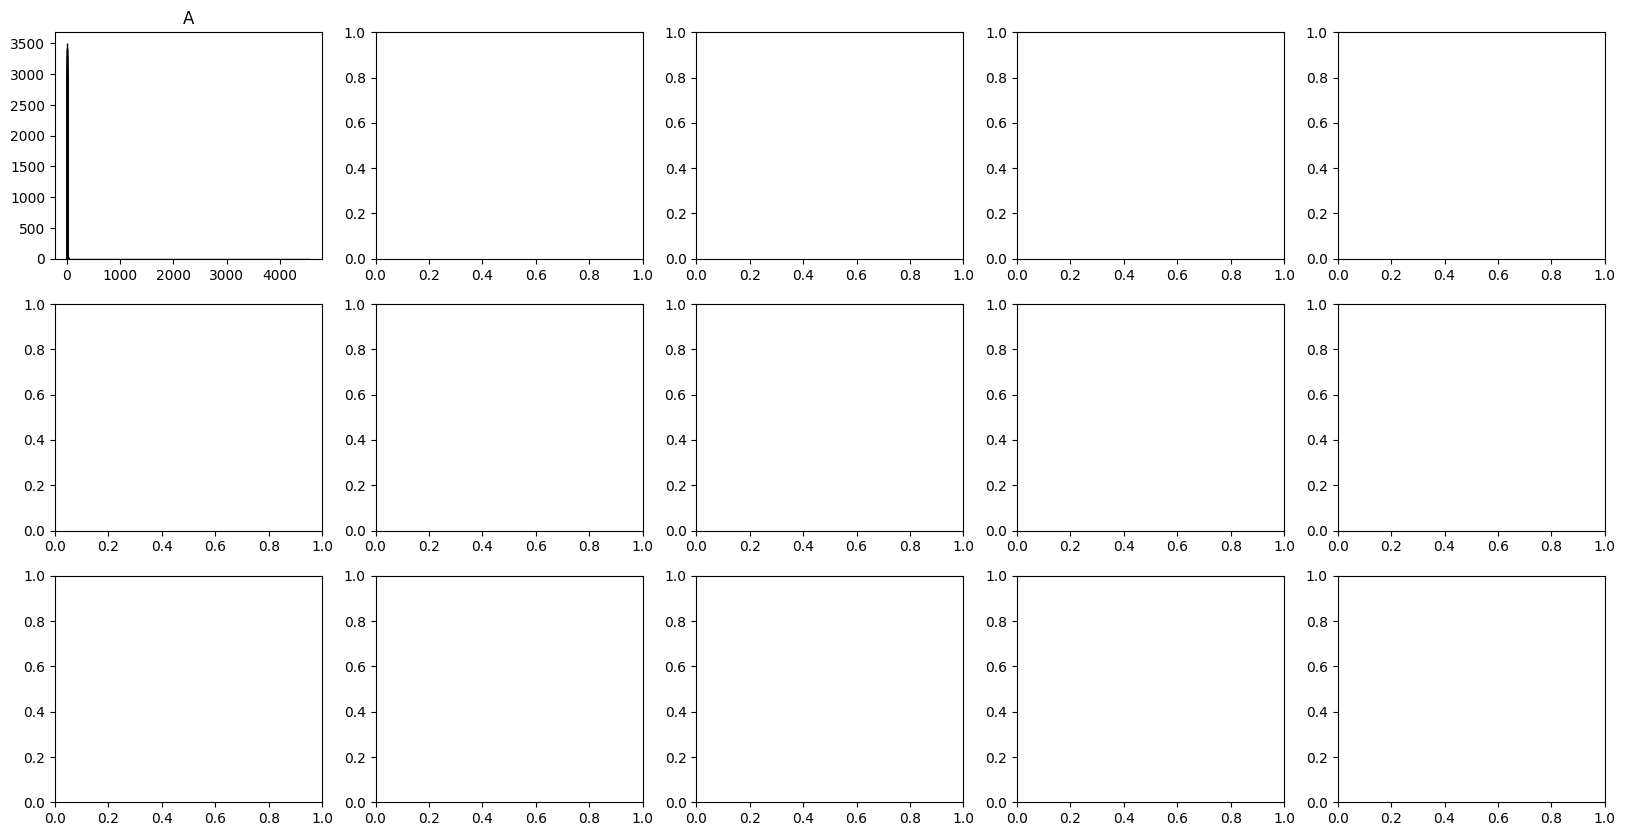

In [60]:
fig, axes = plt.subplots(3,5, figsize=(20,10))
axes = axes.flatten()
for i in range(15):
  axes[i].set_title(QM9_PROPERTIES[i])
  sns.histplot(df[QM9_PROPERTIES[i]], ax=axes[i])
  axes[i].set_xlabel(QM9_PROPERTIES[i])
  axes[i].set_ylabel('Frequency')
  axes[i].grid(True)